In [1]:
import requests as req
import pandas as pd
from api_caller import tradex_caller
import numpy as np
import datetime as dt
from event_data_dynamic import _best_pending_yn

In [86]:
temp1 = tradex_caller("lastTradesInfo", body={"probeid":9737})

In [87]:
temp2 = pd.DataFrame(temp1["trades"])

In [55]:
mask1 = temp2["callvalue"]=="Y"
mask2 = temp2["status"]=="A"
temp2[mask1 & mask2]

,coins,noofcontracts,callvalue,status,updatedat
0,39,1,Y,A,2022-09-17T10:42:39.626Z
1,35,1,Y,A,2022-09-17T10:38:06.287Z
2,37,2,Y,A,2022-09-17T10:26:21.996Z
3,40,1,Y,A,2022-09-17T10:23:04.799Z
6,36,1,Y,A,2022-09-17T09:59:15.655Z
7,37,3,Y,A,2022-09-17T09:57:14.395Z
8,39,1,Y,A,2022-09-17T09:40:41.002Z
9,39,2,Y,A,2022-09-17T09:40:14.437Z


In [56]:
mask1 = temp2["callvalue"]=="Y"
mask2 = temp2["status"]=="EX"
temp2[mask1 & mask2]

,coins,noofcontracts,callvalue,status,updatedat
12,40,9,Y,EX,2022-09-17T09:12:19.206Z


In [57]:
mask1 = temp2["callvalue"]=="N"
mask2 = temp2["status"]=="A"
temp2[mask1 & mask2]

,coins,noofcontracts,callvalue,status,updatedat
4,62,1,N,A,2022-09-17T10:23:04.799Z
5,65,7,N,A,2022-09-17T10:00:26.460Z


In [58]:
mask1 = temp2["callvalue"]=="N"
mask2 = temp2["status"]=="EX"
temp2[mask1 & mask2]

,coins,noofcontracts,callvalue,status,updatedat
10,64,5,N,EX,2022-09-17T09:47:21.982Z
11,62,1,N,EX,2022-09-17T09:46:24.081Z
13,60,9,N,EX,2022-09-17T09:12:19.206Z
14,58,2,N,EX,2022-09-17T09:09:30.164Z
15,58,1,N,EX,2022-09-17T08:54:18.617Z
16,58,1,N,EX,2022-09-17T08:50:57.290Z
17,58,1,N,EX,2022-09-17T08:50:33.455Z
18,58,1,N,EX,2022-09-17T08:50:07.892Z
19,58,1,N,EX,2022-09-17T08:49:28.321Z


In [104]:
eid = 9737
temp1 = tradex_caller("lastTradesInfo", body={"probeid":eid})
temp2 = pd.DataFrame(temp1["trades"])
temp2["updatedat"] = pd.to_datetime(temp2["updatedat"])
temp2 = temp2.sort_values(by="updatedat")
best_y,best_n = _best_pending_yn(eid)

In [105]:
temp3 = temp2.iloc[::-1]

In [106]:
temp3n = temp3[temp3["callvalue"]=="N"].reset_index()
temp3n["wap"] = None
temp3n["best_n"] = best_n
temp3n["value"] = temp3n["coins"]*temp3n["noofcontracts"]
temp3n["cumvalue"] = temp3n["value"].cumsum()
temp3n["price_ma"] = temp3n["coins"].rolling(3).mean()
for i in temp3n.index:
    temp3n["wap"].iloc[i] = temp3n["cumvalue"].iloc[i] / temp3n["noofcontracts"].iloc[:i+1].sum()
    
temp3n

C:\Users\aniru\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,index,coins,noofcontracts,callvalue,status,updatedat,wap,best_n,value,cumvalue,price_ma
0,0,61,1,N,A,2022-09-17 15:37:49.877000+00:00,61.0,59,61,61,NaN
1,10,61,1,N,EX,2022-09-17 15:37:49.877000+00:00,61.0,59,61,122,NaN
2,11,61,1,N,EX,2022-09-17 15:34:45.951000+00:00,61.0,59,61,183,61.000000
3,3,61,1,N,A,2022-09-17 15:34:45.951000+00:00,61.0,59,61,244,61.000000
4,4,60,3,N,A,2022-09-17 15:29:55.135000+00:00,60.571429,59,180,424,60.666667
5,12,60,3,N,EX,2022-09-17 15:29:55.135000+00:00,60.4,59,180,604,60.333333
6,13,60,1,N,EX,2022-09-17 15:27:11.923000+00:00,60.363636,59,60,664,60.000000
7,5,60,1,N,A,2022-09-17 15:27:11.923000+00:00,60.333333,59,60,724,60.000000
8,16,60,1,N,EX,2022-09-17 15:24:47.287000+00:00,60.307692,59,60,784,60.000000
9,15,60,3,N,EX,2022-09-17 15:24:47.287000+00:00,60.25,59,180,964,60.000000


In [107]:
temp4y = temp3[temp3["callvalue"]=="Y"].reset_index()
temp4y["wap"] = None
temp4y["best_y"] = best_y
temp4y["value"] = temp4y["coins"]*temp4y["noofcontracts"]
temp4y["cumvalue"] = temp4y["value"].cumsum()
temp4y["price_ma"] = temp4y["coins"].rolling(3).mean()
for i in temp4y.index:
    temp4y["wap"].iloc[i] = temp4y["cumvalue"].iloc[i] / temp4y["noofcontracts"].iloc[:i+1].sum()
    
temp4y

C:\Users\aniru\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,index,coins,noofcontracts,callvalue,status,updatedat,wap,best_y,value,cumvalue,price_ma
0,1,35,1,Y,A,2022-09-17 15:35:30.446000+00:00,35.0,39,35,35,NaN
1,2,35,19,Y,A,2022-09-17 15:35:14.533000+00:00,35.0,39,665,700,NaN
2,14,40,4,Y,EX,2022-09-17 15:24:47.287000+00:00,35.833333,39,160,860,36.666667
3,19,44,1,Y,EX,2022-09-17 15:17:14.295000+00:00,36.16,39,44,904,39.666667
4,6,45,1,Y,A,2022-09-17 15:17:14.295000+00:00,36.5,39,45,949,43.000000
5,8,44,1,Y,A,2022-09-17 15:03:44.941000+00:00,36.777778,39,44,993,44.333333


<AxesSubplot:>

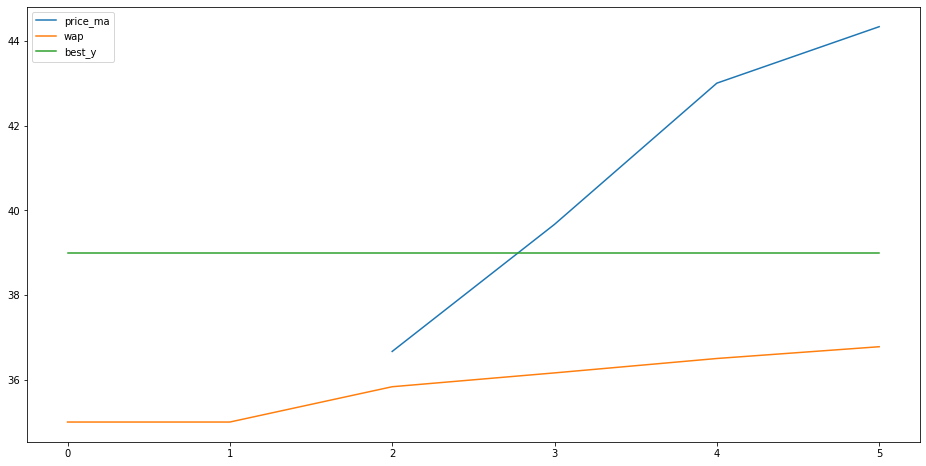

In [108]:
temp4y[["price_ma","wap","best_y"]].plot(figsize=(16,8))

<AxesSubplot:>

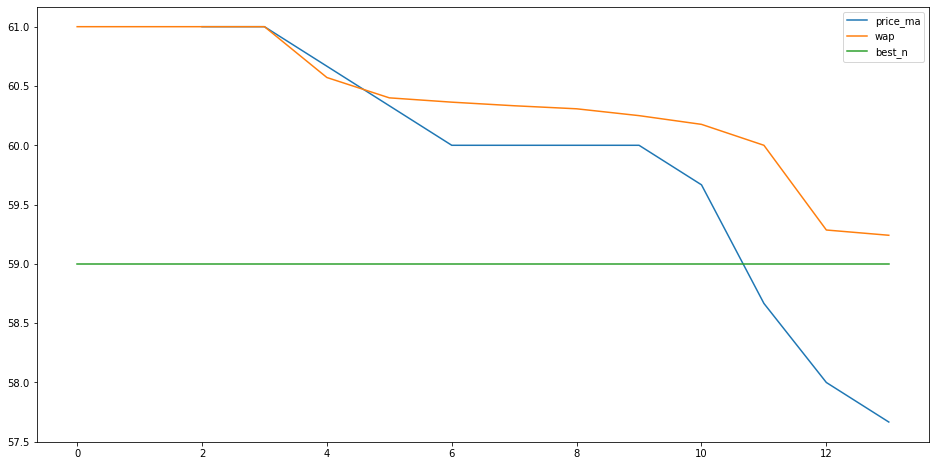

In [109]:
temp3n[["price_ma","wap","best_n"]].plot(figsize=(16,8))